### EDA

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectKBest


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка датасета из файла
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Классическое МО/Курсовая/data.xlsx')

In [ ]:
# Размерность датасета
df.shape

(1001, 214)

In [ ]:
# Выведем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


In [ ]:
# Посмотрим на первые 5 строк
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Описательная статистика
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# Названия столбцов
df.columns.tolist()

['Unnamed: 0',
 'IC50, mM',
 'CC50, mM',
 'SI',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SM

In [ ]:
# Создаём DataFrame с разными статистиками по каждому столбцу
summary = pd.DataFrame()

# Расчет количества уникальных значений
summary['Unique Values'] = df.nunique()

# Общие ненулевые значения (не пропуски)
summary['Total Values'] = df.count()

# Расчет доли уникальных значений от общего числа непустых значений
summary['Unique Percentage'] = (
    (summary['Unique Values'] / summary['Total Values']) * 100
)

# Округление чисел для более читаемого вида
summary['Unique Percentage'] = summary['Unique Percentage'].round(2)

# Вывод итоговой таблицы
print(summary)

                   Unique Values  Total Values  Unique Percentage
Unnamed: 0                  1001          1001             100.00
IC50, mM                     953          1001              95.20
CC50, mM                     888          1001              88.71
SI                           768          1001              76.72
MaxAbsEStateIndex            793          1001              79.22
...                          ...           ...                ...
fr_thiazole                    2          1001               0.20
fr_thiocyan                    1          1001               0.10
fr_thiophene                   2          1001               0.20
fr_unbrch_alkane              13          1001               1.30
fr_urea                        2          1001               0.20

[214 rows x 3 columns]


Столбец Unnamed: 0 содержит 100% уникальных значений, дублируюшиз порядковый номер, соответственно, не несет в себе информативности и должен быть удален.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Проверка наличия пропусков в каждом столбце с подсчетом их количества
missing_counts = df.isnull().sum()

# Выводим количество пропущенных значений по каждому столбцу
print("Общее количество пропущенных значений:")
print(missing_counts)

# Выводим только те столбцы, которые содержат пропуски
columns_with_nan = missing_counts[missing_counts > 0]
print("\nСтолбцы, содержащие пропуски:")
print(columns_with_nan)

# Отбираем все строки, в которых есть хотя бы один пропущенный элемент
rows_with_nan = df[df.isnull().any(axis=1)]

# Выводим строки, содержащие пропущенные значения
print("\nСтроки, содержащие пропущенные значения:")
print(rows_with_nan)

Общее количество пропущенных значений:
IC50, mM             0
CC50, mM             0
SI                   0
MaxAbsEStateIndex    0
MaxEStateIndex       0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 213, dtype: int64

Столбцы, содержащие пропуски:
MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64

Строки, содержащие пропущенные значения:
       IC50, mM     CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  \
78  1127.094988  1127.094988   1.000000          11.617504       11.617504   
79    25.171788  1878.491646  74.626866          11.617504       11.617504   
80  1199.174968  1199.174968   1.000000          11.600528    

Все значения Nan заменим на 0.

In [ ]:
df = df.fillna(0)

Видим, что есть столбцы, где в значениях много 0, проверим  и удалим все столбцы, которые содержат только значения 0

In [ ]:
# Создаем маску: True для столбцов, где все значения равны нулю
cols_with_all_zeros = (df == 0).all()

# Выбираем имена столбцов, где all() возвращает True
columns_only_zero = cols_with_all_zeros[cols_with_all_zeros].index.tolist()

# Количество таких столбцов
count_only_zero = len(columns_only_zero)

print(f"Столбцы, содержащие только нулевые значения ({count_only_zero} шт):")
print(columns_only_zero)

# Удаляем эти столбцы из датафрейма
df= df.drop(columns=columns_only_zero)

print(f"Удалено {len(columns_only_zero)} столбцов, содержащих только нули.")

Столбцы, содержащие только нулевые значения (18 шт):
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Удалено 18 столбцов, содержащих только нули.


Анализ распределения и наличия выбросов в данных

Для более точной оценки аномальных данных будет выполнен анализ только по ключевым целевым переменным: “IC50, mM”, “CC50, mM” и “SI”. Такой подход выбран с учетом важности этих показателей, поскольку исключение выбросов именно из данных этих столбцов способствует сохранению основной информации, тогда как удаление аномальных точек из остальных признаков может значительно уменьшить размер выборки и негативно повлиять на качество моделированных результатов. Процедура включает выделение и удаление выбросов отдельно для каждого столбца, что приведет к формированию отдельных датасетов для каждой целевой переменной. Такой раздельный подход позволяет лучше учесть специфику каждого показателя и обеспечить более точную подготовку данных для последующего машинного обучения.

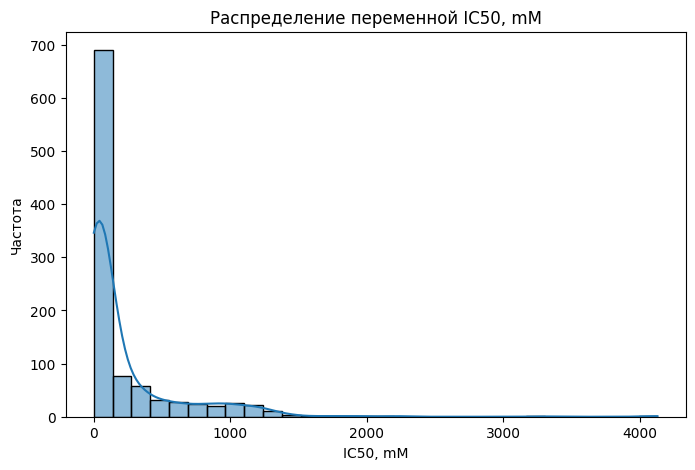

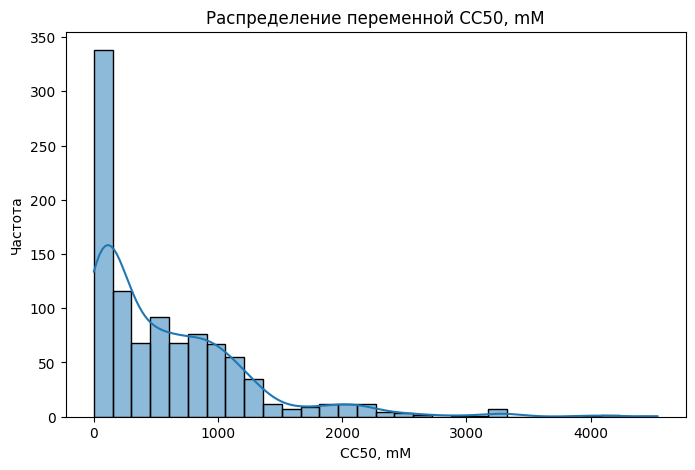

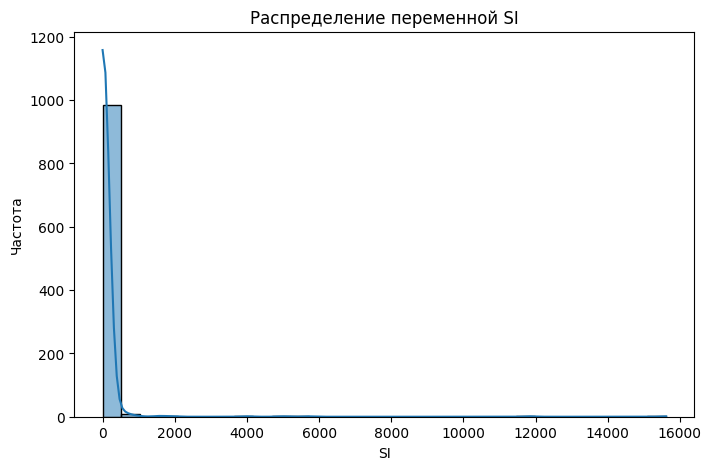

In [ ]:
# Список целевых переменных
target_columns = ["IC50, mM", "CC50, mM", "SI"]

for col in target_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Распределение переменной {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

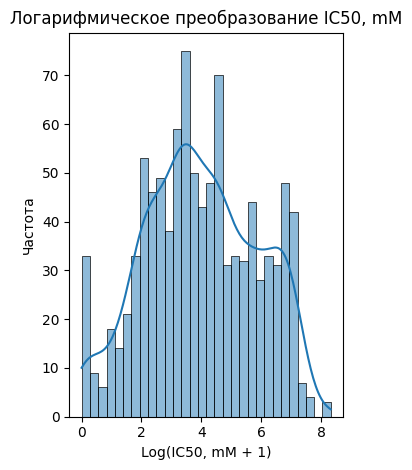

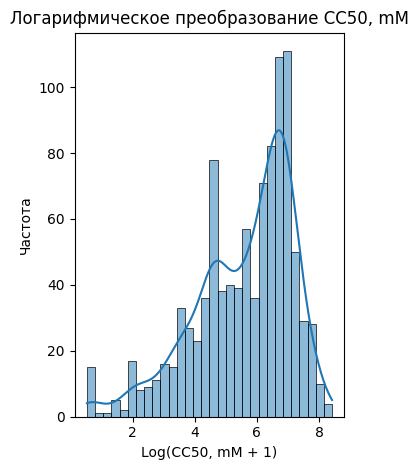

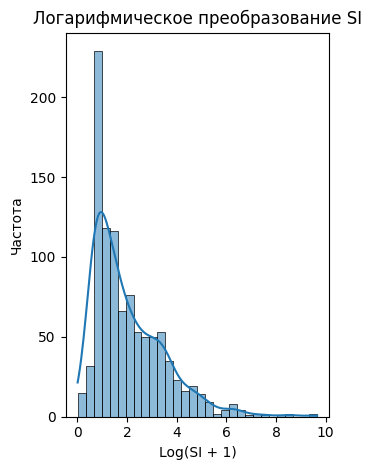

In [ ]:
for col in target_columns:
    # Логарифмическое преобразование
    transformed = np.log(df[col] + 1)

    # После преобразования
    plt.subplot(1, 2, 2)
    sns.histplot(transformed, bins=30, kde=True)
    plt.title(f"Логарифмическое преобразование {col}")
    plt.xlabel(f"Log({col} + 1)")
    plt.ylabel("Частота")

    plt.tight_layout()
    plt.show()

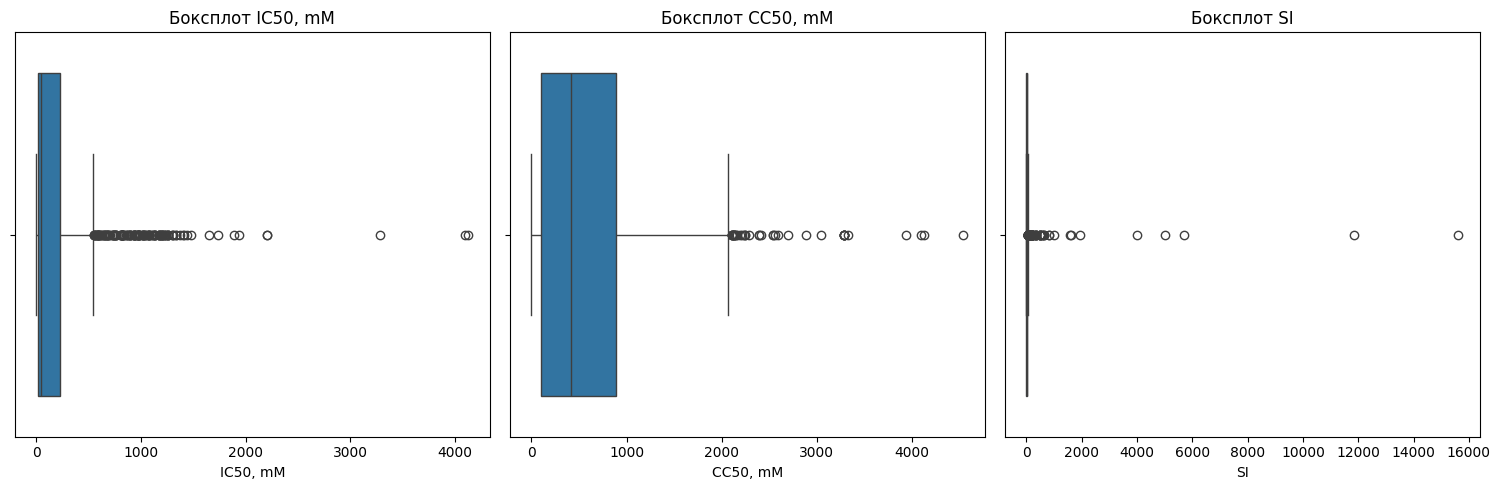

In [ ]:
# Посмотрим на выбросы

# создаем фигуру с тремя горизонтальными боксплотами рядом
fig, axes = plt.subplots(1, len(target_columns), figsize=(15, 5))

if len(target_columns) == 1:
    axes = [axes]

for i, col in enumerate(target_columns):
    sns.boxplot(x=df[col], orient='h', ax=axes[i])
    axes[i].set_title(f'Боксплот {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

1. Боксплот для IC50
Медиана (центральная линия): Значение IC50, при котором 50% данных находятся ниже, а 50% — выше. Это показатель центральной тенденции.
Квантили (границы прямоугольника): Нижняя граница прямоугольника — 25-й процентиль (Q1), верхняя — 75-й процентиль (Q3). Это показывает диапазон, в котором сосредоточена основная часть данных.
Усы (whiskers): Линии, выходящие за пределы прямоугольника, показывают диапазон данных, исключая выбросы. Обычно это 1,5 * IQR (межквартильный размах, Q3 - Q1).
Выбросы (точки за пределами усов): Значения, которые значительно отклоняются от основного распределения. Они могут быть аномалиями или редкими случаями.
Интерпретация: Распределение IC50 имеет относительно узкий диапазон, что говорит о том, что большинство соединений имеют схожую эффективность. Наличие выбросов может указывать на соединения с аномально высокой или низкой активностью.

2. Боксплот для CC50
Медиана: Центральное значение CC50, показывающее токсичность соединений.
Квантили: Показывают разброс данных. Широкий прямоугольник указывает на значительную вариативность токсичности.
Усы: Показывают диапазон данных без учета выбросов.
Выбросы: Соединения с аномально высокой или низкой токсичностью.
Интерпретация: Распределение CC50 более широкое, чем IC50, что говорит о значительной вариативности токсичности соединений. Наличие выбросов может указывать на соединения с необычно высокой или низкой токсичностью.

3. Боксплот для SI (Selective Index)
Медиана: Центральное значение SI, показывающее избирательность действия соединений.
Квантили: Показывают разброс данных. Узкий прямоугольник указывает на схожую избирательность большинства соединений.
Усы: Показывают диапазон данных без учета выбросов.
Выбросы: Соединения с аномально высокой или низкой избирательностью.
Интерпретация: Распределение SI относительно узкое, что говорит о схожей избирательности большинства соединений. Наличие выбросов может указывать на соединения с необычно высокой или низкой избирательностью.


IC50: Большинство соединений имеют схожую эффективность, но есть выбросы с аномальной активностью.

CC50: Токсичность соединений варьируется сильнее, чем их эффективность, что может указывать на необходимость дальнейшего анализа для выявления безопасных соединений.

SI: Большинство соединений имеют схожую избирательность, но выбросы могут представлять интерес для дальнейшего изучения.

###Проведем обработку выбросов методом межквартильного размаха (IQR)

Для числовых признаков в датасете применяется методика устранения выбросов, основанная на межквартильном размахе (IQR). Процесс включает следующие шаги:
•	Для каждого числового признака вычисляются первый (Q1) и третий (Q3) квартиль.
•	Рассчитывается межквартильный размах: IQR = Q3 – Q1.
•	Определяются границы допустимых значений:
- Нижняя граница: Q1 – 1.5 × IQR (стандартный гиперпараметр)
- Верхняя граница: Q3 + 15 × IQR (расширенный гиперпараметр)
•	Значения за пределами этих границ считаются выбросами.
•	Обнаруженные выбросы замещаются:
- Значения ниже нижней границы — на саму нижнюю границу.
- Значения выше верхней границы — на верхнюю границу.
Целью данной процедуры является снижение влияния экстремальных точек на обучение моделей, сглаживание распределения признаков и повышение стабильности предсказаний.
Отличительная особенность метода — использование расширенной верхней границы (множитель 15 вместо стандартных 1.5), что уменьшает чувствительность к высоким выбросам, сохраняя при этом валидные редкие наблюдения.

После обработки данные сохраняются в новый датафрейм `df_iqr` для последующих этапов моделирования.


In [ ]:
# Создаем копию датафрейма для обработки и переименовываем
df_iqr = df.copy()

for col in target_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Расчет расширенной верхней границы
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 15 * IQR  # расширенный множитель

    # Замена выбросов ниже нижней границы
    df_iqr[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    # Замена выбросов выше верхней границы
    df_iqr[col] = np.where(df_iqr[col] > upper_bound, upper_bound, df[col])

df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 195 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(88)
memory usage: 1.5 MB


### Для каждой целевой переменной выведем 10 самых значимых признаков

In [ ]:
# Названия исходных и логарифмированных колонок
target_columns = ["IC50, mM", "CC50, mM", "SI", "IC50, mM_lg", "CC50, mM_lg", "SI_lg"]
columns_lg = ["IC50, mM_lg", "CC50, mM_lg", "SI_lg"]

# Создаем логарифмические колонки в df_iqr
for col, col_lg in zip(target_columns, columns_lg):
    df_iqr[col_lg] = np.log(df_iqr[col] + 1)  # добавляем 1, чтобы избежать логарифма нуля

X = df_iqr.drop(columns=target_columns)

# Формируем словарь для хранения топ-10 признаков по каждой лог. переменной
top_features_per_target = {}

# Анализ по каждой логарифмированной цели
for col in columns_lg:
    selector = SelectKBest(score_func=mutual_info_regression, k=10)
    selector.fit(X, df_iqr[col])
    selected_features = X.columns[selector.get_support(indices=True)].tolist()
    # Записываем
    top_features_per_target[col] = selected_features

# Создаем таблицу результатов
best_features_df = pd.DataFrame({
    k: pd.Series(list(set(v)))
    for k, v in top_features_per_target.items()
})
print("Лучшие признаки для каждого логарифмированного целевого признака:\n", best_features_df)

# Получим уникальные признаки из best_features_per_target
unique_features = list(set(sum(top_features_per_target.values(), [])))

Лучшие признаки для каждого логарифмированного целевого признака:
            IC50, mM_lg          CC50, mM_lg                SI_lg
0       BCUT2D_LOGPLOW            LabuteASA       BCUT2D_LOGPLOW
1     MaxPartialCharge           ExactMolWt     MaxPartialCharge
2           ExactMolWt                 Chi1         BCUT2D_MWLOW
3        BCUT2D_LOGPHI                MolWt  MaxAbsPartialCharge
4                MolWt  NumValenceElectrons               AvgIpc
5         BCUT2D_CHGLO       HeavyAtomCount        BCUT2D_LOGPHI
6                 Chi0                 Chi0         BCUT2D_CHGLO
7       HeavyAtomMolWt                Chi0v             SMR_VSA4
8               Kappa1       HeavyAtomMolWt         BCUT2D_MRLOW
9  MinAbsPartialCharge               Kappa1             SMR_VSA5


In [ ]:
df_iqr.shape

(1001, 198)

In [ ]:
df_iqr.head(3)

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM_lg","CC50, mM_lg",SI_lg
0,6.239374,175.482382,28.125,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,...,0,0,0,0,0,3,0,1.979535,5.173221,3.371597
1,0.771831,5.402819,7.000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,...,0,0,0,0,0,3,0,0.572014,1.856738,2.079442
2,223.808778,161.142320,0.720,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,...,0,0,0,0,0,3,0,5.415250,5.088474,0.542324


### Визуализируем распределение выбранных признаков

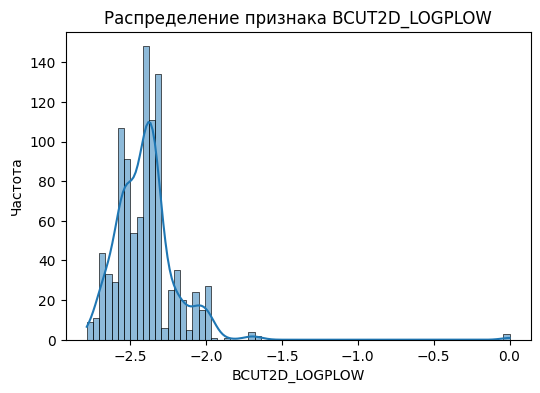

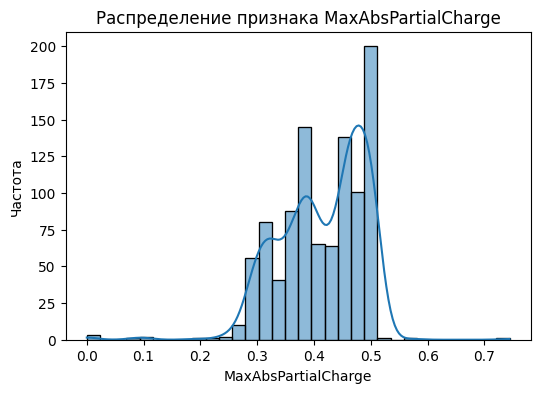

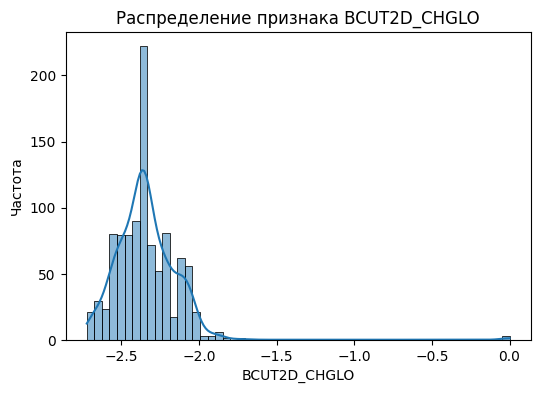

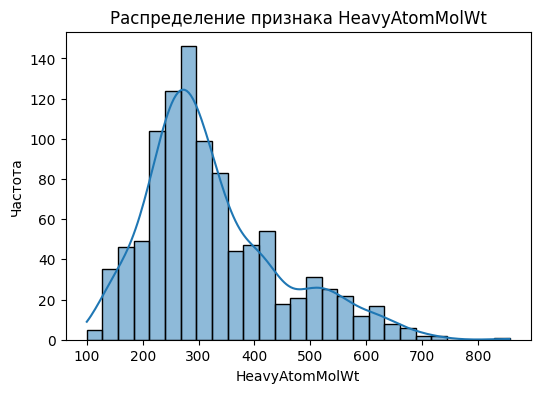

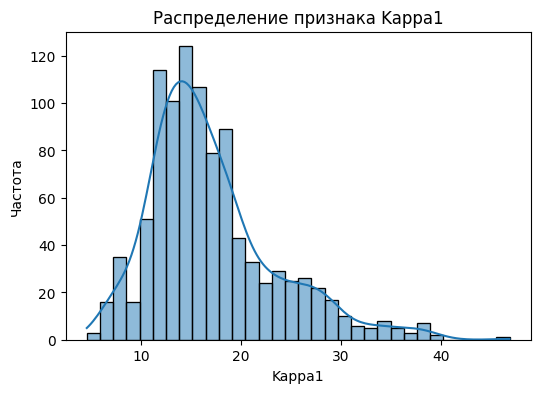

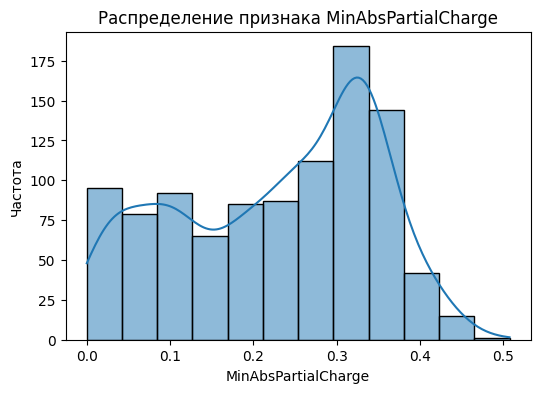

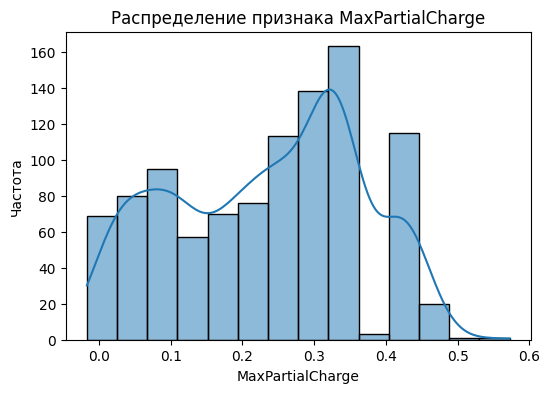

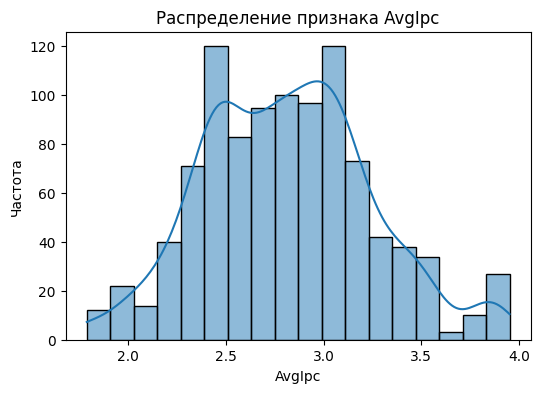

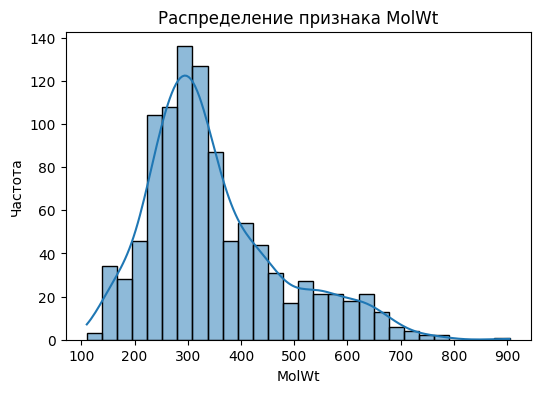

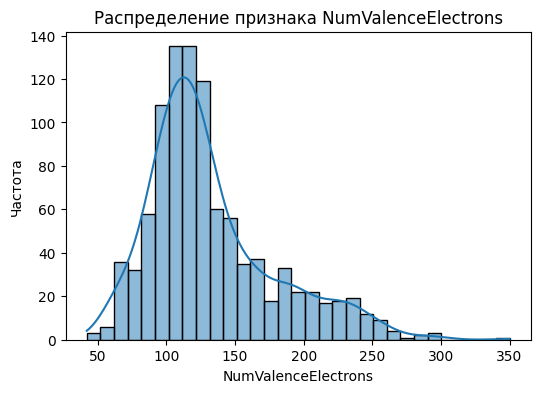

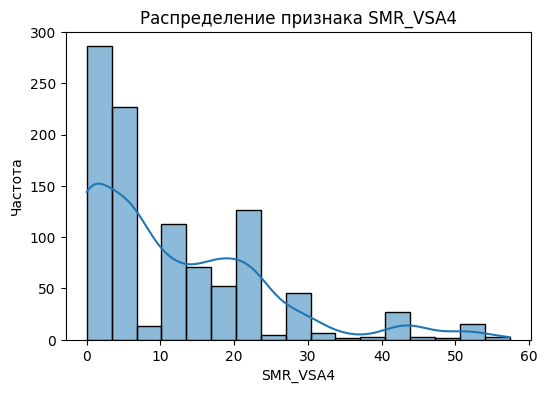

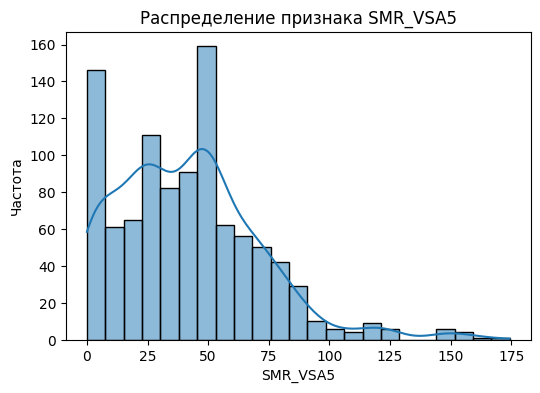

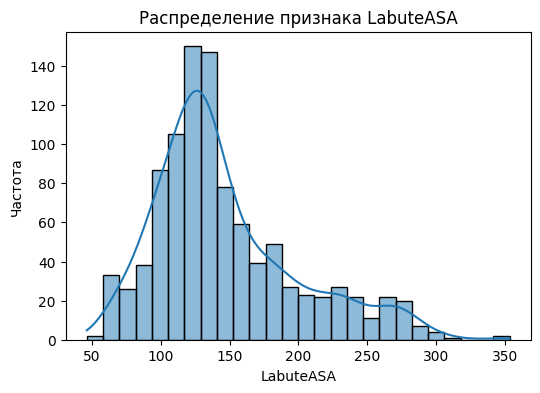

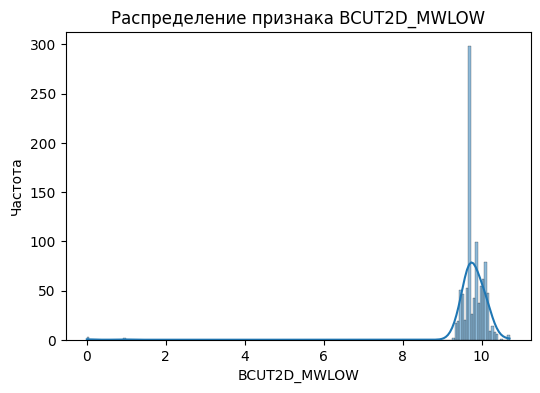

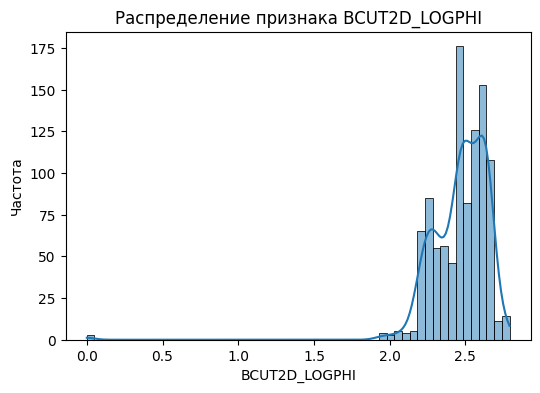

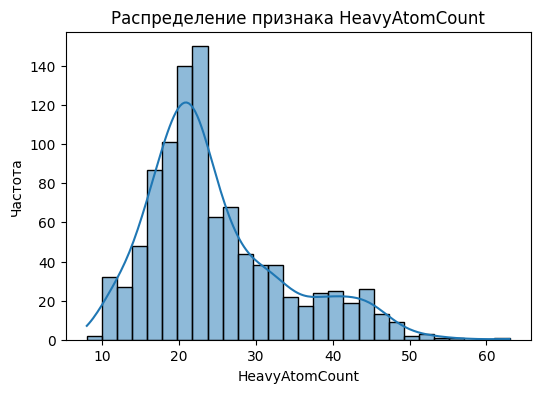

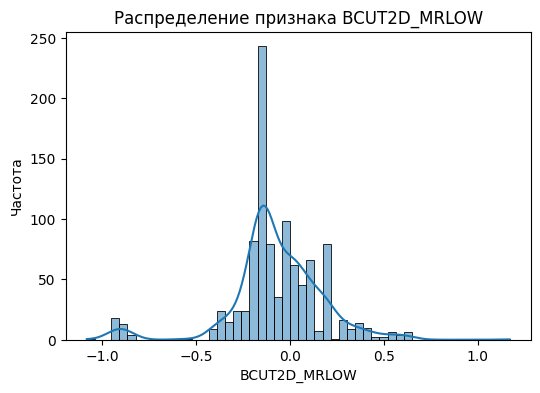

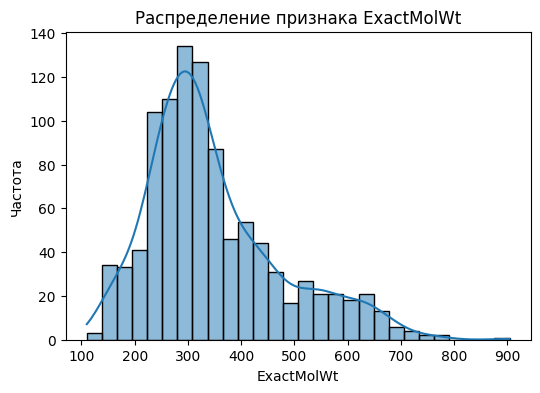

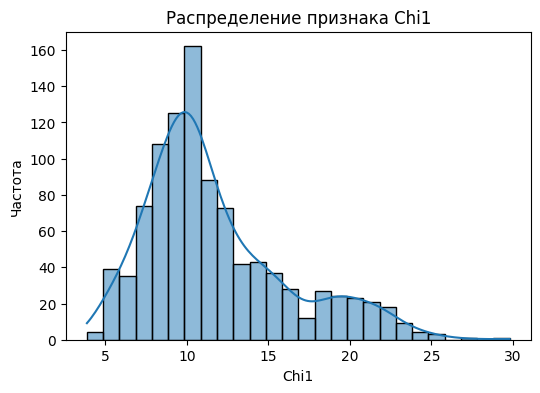

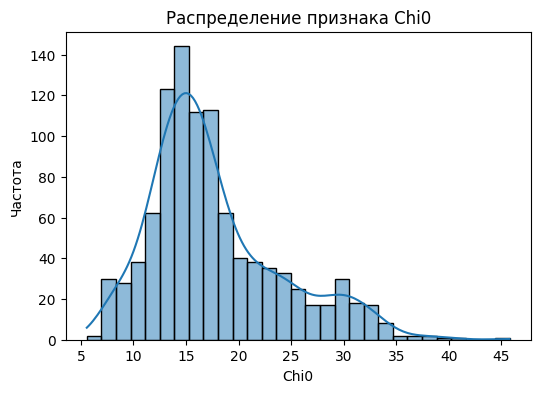

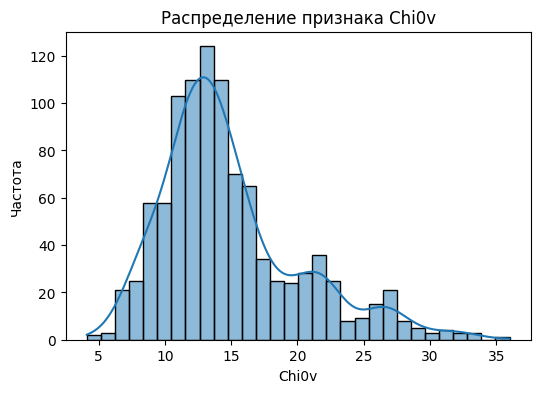

In [ ]:
for feature in set(sum(top_features_per_target.values(), [])):
    plt.figure(figsize=(6, 4))
    sns.histplot(df_iqr[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

Данные распределены не нормально, распределение признаков сильно скошено и содержит выбросы, и важна именно относительная разметка, поэтому используем для нормализации MinMaxScaler который масштабирует все признаки в диапазон [0, 1].




In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_iqr[unique_features])
df_scaled = df_iqr.copy()
df_scaled[unique_features] = X_scaled

In [ ]:
df_scaled

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM_lg","CC50, mM_lg",SI_lg
0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,0.345443,...,0,0,0,0,0,3,0,1.979535,5.173221,3.371597
1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,0.350517,...,0,0,0,0,0,3,0,0.572014,1.856738,2.079442
2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,0.423664,...,0,0,0,0,0,3,0,5.415250,5.088474,0.542324
3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,0.363095,...,0,0,0,0,0,4,0,0.995333,4.690023,4.162553
4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,0.448713,...,0,0,0,0,0,0,0,4.683348,4.943576,0.832909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,12.934891,12.934891,0.048029,-0.476142,0.382752,49.133333,0.383058,...,0,0,0,0,0,0,0,3.465739,3.583509,0.755660
997,31.999934,33.999415,1.062484,13.635345,13.635345,0.030329,-0.699355,0.369425,44.542857,0.472508,...,0,0,0,0,0,0,0,3.496506,3.555331,0.723911
998,30.999883,33.999458,1.096761,13.991690,13.991690,0.026535,-0.650790,0.284923,41.973684,0.548168,...,0,0,0,0,0,0,0,3.465732,3.555333,0.740394
999,31.998959,32.999644,1.031272,13.830180,13.830180,0.146522,-1.408652,0.381559,39.000000,0.519089,...,0,0,0,0,0,0,0,3.496476,3.526350,0.708662


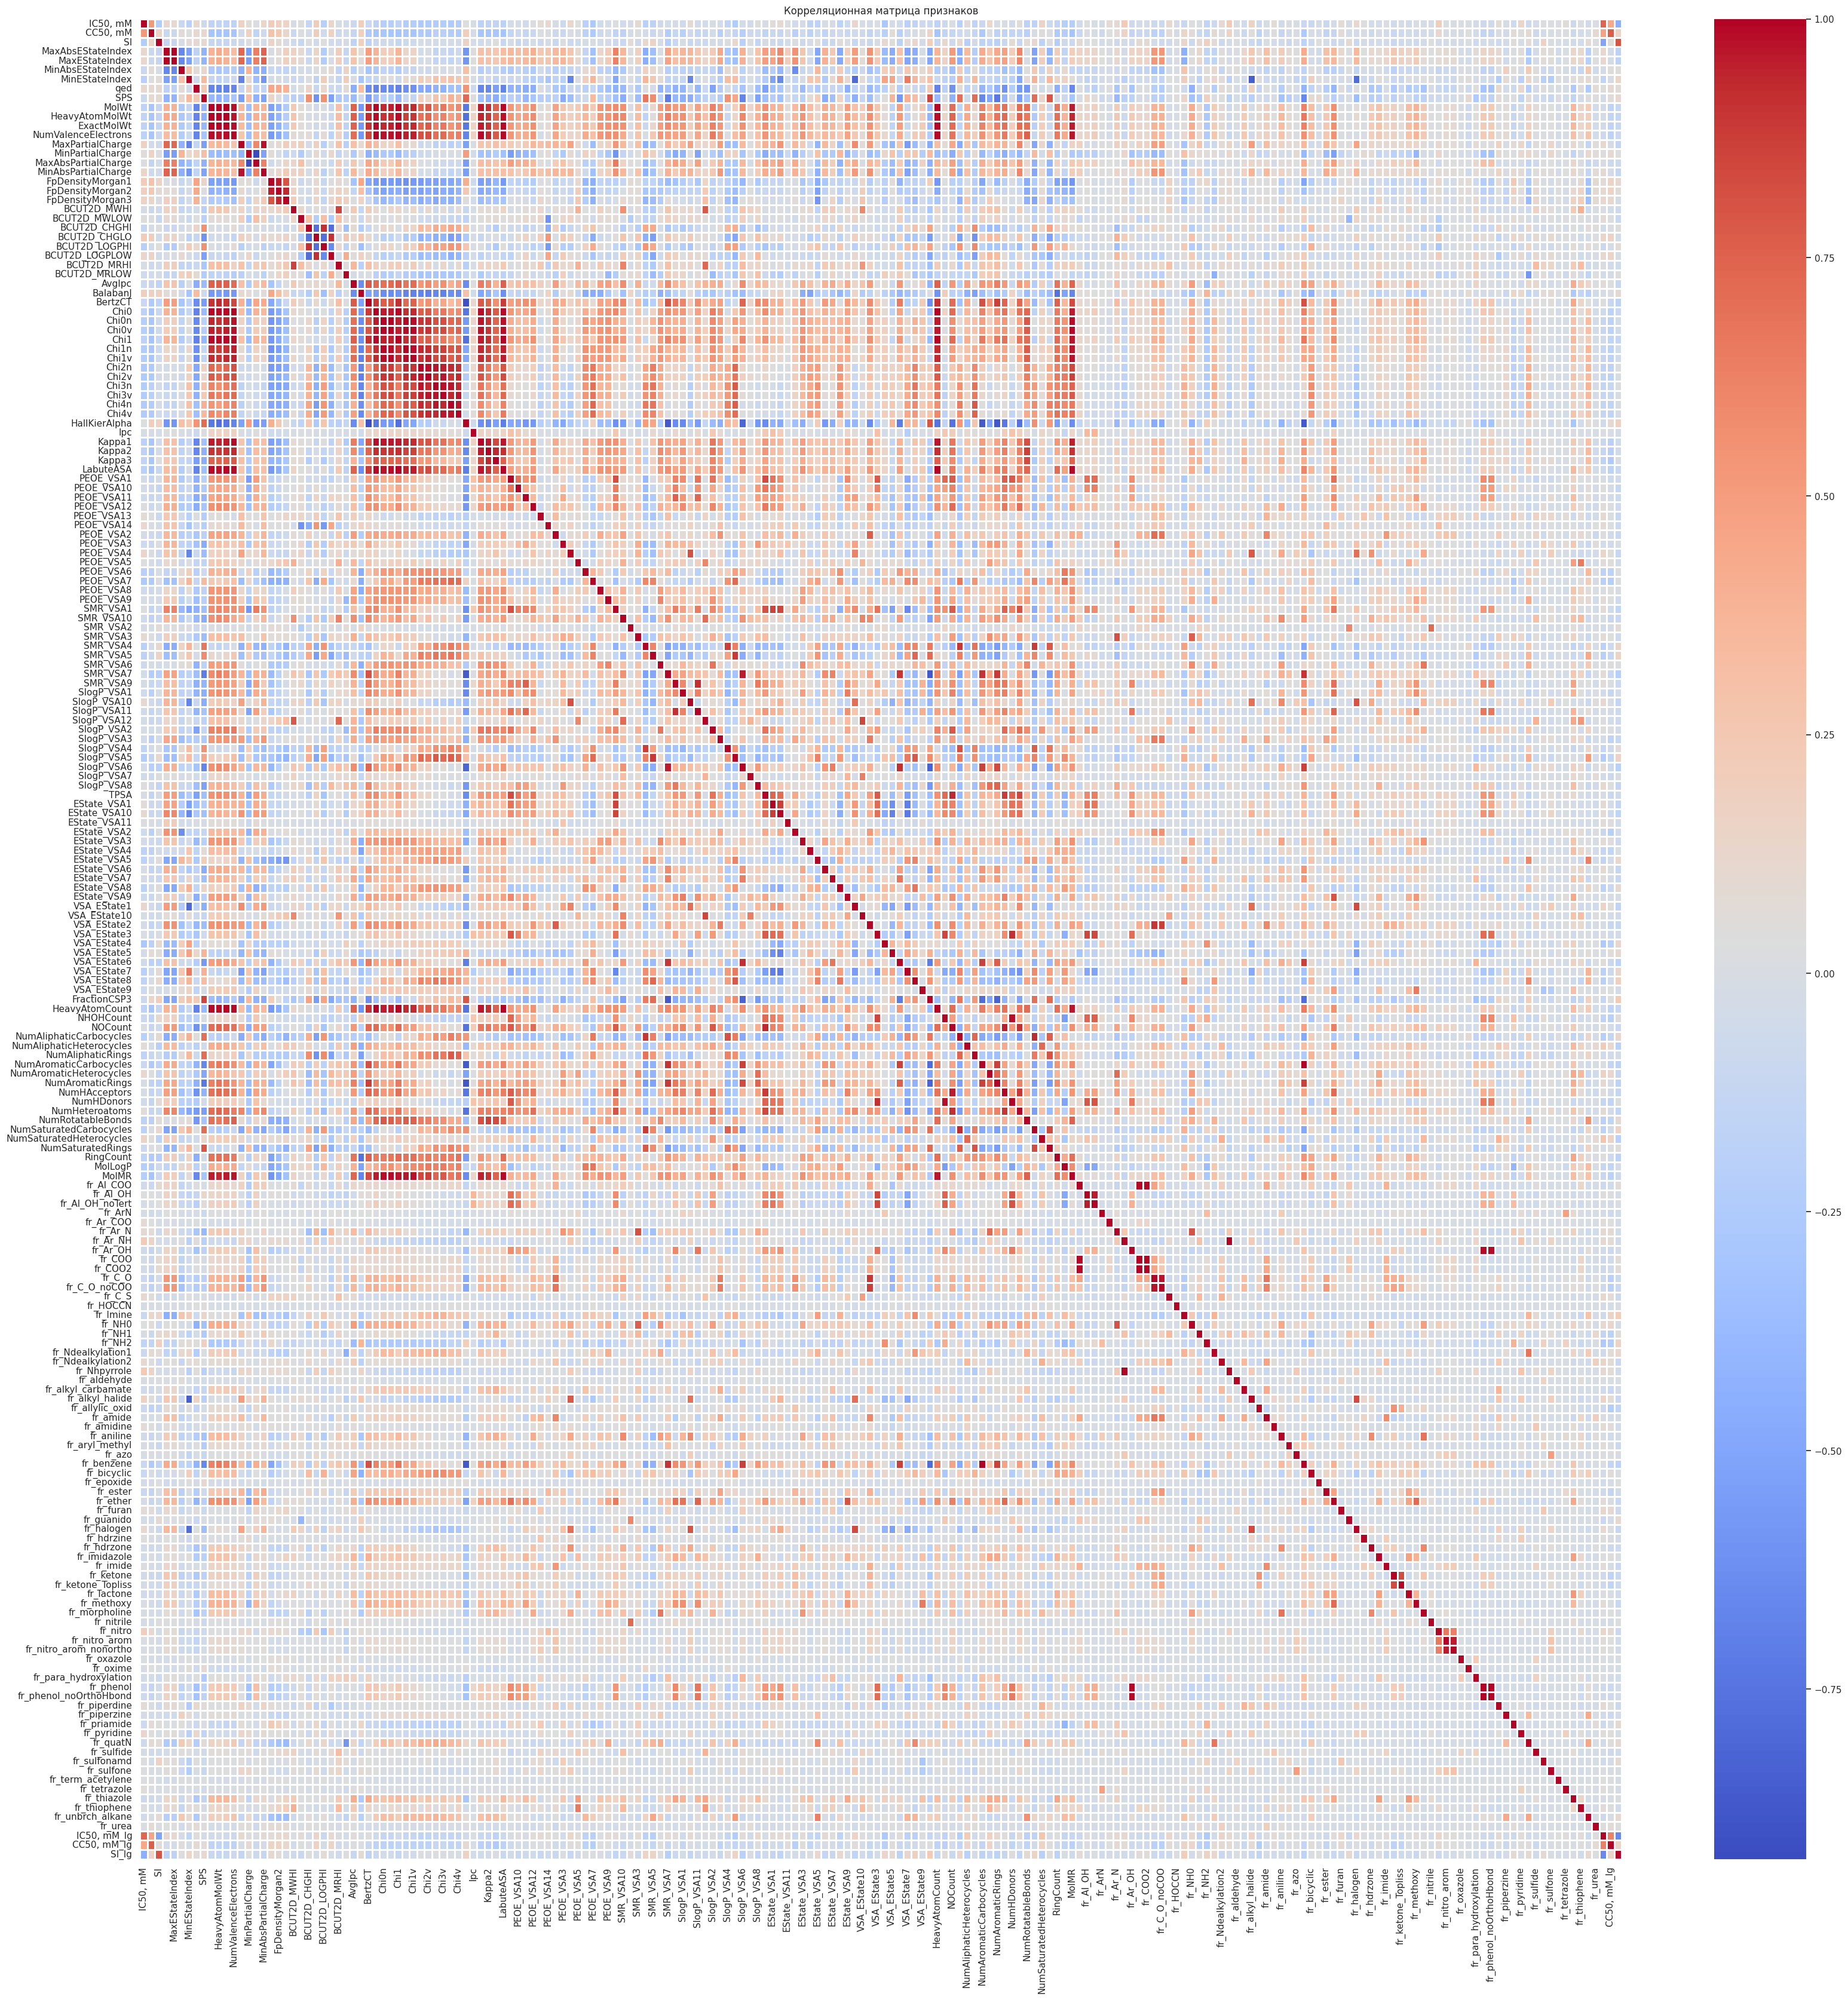

In [ ]:
# Настраиваем размеры фигуры для лучшей читаемости
sns.set(rc={'figure.figsize': (40, 40)})

# Настроим визуализацию
sns.heatmap(
    df_scaled.corr(),
    cmap='coolwarm',            # цветовая карта
    linewidths=1,               # ширина линий деления
    cbar=True                   # показывать цветовую панель
)

plt.title("Корреляционная матрица признаков")
plt.show()

# Сохраним датасет для дальнейшего обучения моделей

In [ ]:
df_scaled.to_excel('/content/drive/MyDrive/Colab Notebooks/Классическое МО/Курсовая/df_EDA.xlsx', index=False)